In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

Text(0,0.5,'Price in $/Mbyte')

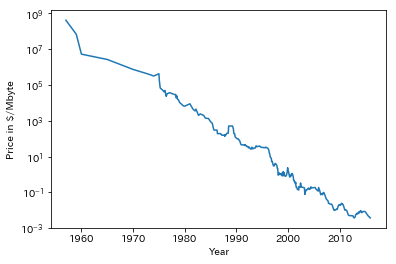

In [5]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

このグラフは年ごとのメモリ(RAM)価格の履歴のデータセットである。y軸は自然対数をとってある  
2000年までのデータを使って、それ以降のデータを予測してみる  
ひとつは線形回帰モデルで、もうひとつ決定木による回帰モデルである。

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#日付に基づいて価格を予測する
data_train.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [29]:
#np.newaxisで(202,)を(202,1)の縦ベクトルに変換している
X_train = data_train.date[:,np.newaxis]
#dataとターゲットの関係を単純化するために対数変換。対数をとると大きな値での増加率が低くなるので、対数をとる前とスケールの間隔が小さくなる
y_train = np.log(data_train.price)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (202, 1)
y_train shape: (202,)


In [30]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)

In [37]:
#すべての価格を予想
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_linear = linear_reg.predict(X_all)

#対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_linear = np.exp(pred_linear)

Text(0,0.5,'Price in $/Mbyte')

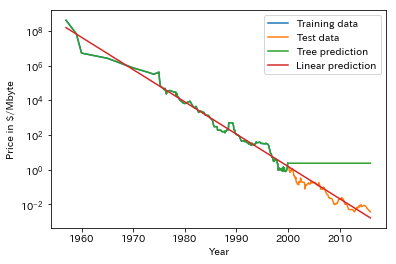

In [39]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date,price_linear, label='Linear prediction')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')

二つのモデルの予測は大きく異なるものになった  
- 線形モデルは訓練データに対してとりこぼしがあるものの、テストデータに対しては良い予測を与えている。
- 決定木モデルは訓練データに完全に一致している。これは複雑さに制御を与えていないからだ(分類の時を参照)。ただし、テストデータになると決定木は最後の値を返すだけとなっている  
決定木は訓練データにない領域に対しては「新しい」答えを生成することができない。